In [105]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from root_pandas import read_root
from __future__ import division
from statsmodels.stats.proportion import proportion_confint
%run functions.ipynb

In [99]:
def geteff(nRec, nEvt):
    y = []
    yerr = []
    for i in range(0, len(nEvt)):
        if nEvt[i] == 0:
            y.append(0)
            yerr.append([0,0])
        else:
            y.append(nRec[i] / nEvt[i])
            a = abs(proportion_confint(nRec[i], nEvt[i], 1 - 0.68, 'jeffreys') - nRec[i] / nEvt[i])
            yerr.append(a)
    return y, np.asarray(yerr).T

In [117]:
def getDataAll(inputFiles):
    cols = []
    scalar = []
    scalar.append('event')
    cols.append('all_truthNComponent')
    cols.append('all_truthE')
    cols.append('all_truthEta')

    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [123]:
def getDataMatched(inputFiles):
    cols = []
    scalar = []
    scalar.append('event')
    cols.append('matched_truthNComponent')
    cols.append('matched_truthE')
    cols.append('matched_truthEta')

    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [4]:
file1 = ["$HOME/EIC/output/sphenix.root"]

In [124]:
a = getDataAll(file1)
b = getDataMatched(file1)


Processed $HOME/EIC/output/sphenix.root in 0.3 seconds

Processed $HOME/EIC/output/sphenix.root in 0.5 seconds


In [150]:
for i in range(0, 1000):
    match = np.asarray(b['matched_truthEta'])[i]
    for j in range(0, len(a)):
        alll = np.asarray(a['all_truthEta'])[j]
        if match == alll:
            break
        if j == len(a)-1:
            print b.loc[[i]]

   matched_truthNComponent  event  matched_truthEta  matched_truthE  \
5                        6      5         -1.253286        12.55087   

   __array_index  
5              1  
    matched_truthNComponent  event  matched_truthEta  matched_truthE  \
31                       -1     38               NaN             NaN   

    __array_index  
31              0  
    matched_truthNComponent  event  matched_truthEta  matched_truthE  \
36                        4     47         -1.306699        12.48312   

    __array_index  
36              0  
    matched_truthNComponent  event  matched_truthEta  matched_truthE  \
57                        4     66         -1.456034        8.180066   

    __array_index  
57              1  
    matched_truthNComponent  event  matched_truthEta  matched_truthE  \
85                        8     90         -0.997247       15.639508   

    __array_index  
85              2  
     matched_truthNComponent  event  matched_truthEta  matched_truthE  \
117   

KeyboardInterrupt: 

In [125]:
a1 = applyCut(a, 'abs(all_truthEta) < 0.7', 'all_truthEta')
a1 = applyCut(a1, 'all_truthNComponent > 3', 'all_truthNComponent')
a1 = applyCut(a1, 'all_truthE > 5', 'all_truthE')

all_truthEta 22422  fraction kept: 20.4
all_truthNComponent 12015  fraction kept: 53.6
all_truthE 6915  fraction kept: 57.6


In [126]:
b1 = applyCut(b, 'abs(matched_truthEta) < 0.7', 'matched_truthEta')
b1 = applyCut(b1, 'matched_truthNComponent > 3', 'matched_truthNComponent')
b1 = applyCut(b1, 'matched_truthE > 5', 'matched_truthE')

matched_truthEta 15304  fraction kept: 53.1
matched_truthNComponent 10083  fraction kept: 65.9
matched_truthE 6834  fraction kept: 67.8


In [15]:
etaedges = np.arange(-1.1, 1.2, 0.1)

[-1.1000000e+00 -1.0000000e+00 -9.0000000e-01 -8.0000000e-01
 -7.0000000e-01 -6.0000000e-01 -5.0000000e-01 -4.0000000e-01
 -3.0000000e-01 -2.0000000e-01 -1.0000000e-01  8.8817842e-16
  1.0000000e-01  2.0000000e-01  3.0000000e-01  4.0000000e-01
  5.0000000e-01  6.0000000e-01  7.0000000e-01  8.0000000e-01
  9.0000000e-01  1.0000000e+00  1.1000000e+00]


In [106]:
a_arr = partitionEta(a, etaedges, etaname = 'all_truthEta')
b_arr = partitionEta(b, etaedges, etaname = 'matched_truthEta')

-1.1 < all_truthEta < -1.0 900  fraction kept: 0.8
-1.0 < all_truthEta < -0.8999999999999999 992  fraction kept: 0.9
-0.8999999999999999 < all_truthEta < -0.7999999999999998 1052  fraction kept: 1.0
-0.7999999999999998 < all_truthEta < -0.6999999999999997 1094  fraction kept: 1.0
-0.6999999999999997 < all_truthEta < -0.5999999999999996 1285  fraction kept: 1.2
-0.5999999999999996 < all_truthEta < -0.49999999999999956 1289  fraction kept: 1.2
-0.49999999999999956 < all_truthEta < -0.39999999999999947 1355  fraction kept: 1.2
-0.39999999999999947 < all_truthEta < -0.2999999999999994 1455  fraction kept: 1.3
-0.2999999999999994 < all_truthEta < -0.1999999999999993 1436  fraction kept: 1.3
-0.1999999999999993 < all_truthEta < -0.0999999999999992 1508  fraction kept: 1.4
-0.0999999999999992 < all_truthEta < 8.881784197001252e-16 1509  fraction kept: 1.4
8.881784197001252e-16 < all_truthEta < 0.10000000000000098 1602  fraction kept: 1.5
0.10000000000000098 < all_truthEta < 0.2000000000000010

In [107]:
a1_arr = partitionEta(a1, etaedges, etaname = 'all_truthEta')
b1_arr = partitionEta(b1, etaedges, etaname = 'matched_truthEta')

-1.1 < all_truthEta < -1.0 0  fraction kept: 0.0
-1.0 < all_truthEta < -0.8999999999999999 0  fraction kept: 0.0
-0.8999999999999999 < all_truthEta < -0.7999999999999998 0  fraction kept: 0.0
-0.7999999999999998 < all_truthEta < -0.6999999999999997 0  fraction kept: 0.0
-0.6999999999999997 < all_truthEta < -0.5999999999999996 485  fraction kept: 7.0
-0.5999999999999996 < all_truthEta < -0.49999999999999956 438  fraction kept: 6.3
-0.49999999999999956 < all_truthEta < -0.39999999999999947 434  fraction kept: 6.3
-0.39999999999999947 < all_truthEta < -0.2999999999999994 452  fraction kept: 6.5
-0.2999999999999994 < all_truthEta < -0.1999999999999993 432  fraction kept: 6.2
-0.1999999999999993 < all_truthEta < -0.0999999999999992 424  fraction kept: 6.1
-0.0999999999999992 < all_truthEta < 8.881784197001252e-16 441  fraction kept: 6.4
8.881784197001252e-16 < all_truthEta < 0.10000000000000098 491  fraction kept: 7.1
0.10000000000000098 < all_truthEta < 0.20000000000000107 493  fraction ke

In [53]:
x = np.arange(-1.05, 1.15, 0.1)

In [68]:
nRec = []
nEvt = []
for i in range(0, len(etaedges)-1):
    nRec.append(len(b_arr[i]))
    nEvt.append(len(a_arr[i]))

In [70]:
nRec_cut = []
nEvt_cut = []
for i in range(0, len(etaedges)-1):
    nRec_cut.append(len(b1_arr[i]))
    nEvt_cut.append(len(a1_arr[i]))

In [94]:
y, yerr = geteff(np.asarray(nRec), np.asarray(nEvt))

Text(-1,0.1,'$Q^2 > 16 \\, \\mathrm{GeV^2}$')

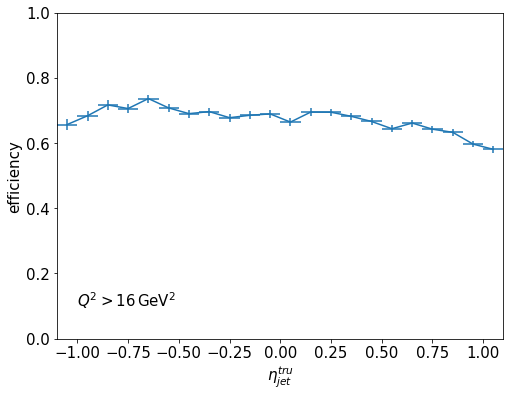

In [96]:
fig = plt.figure(figsize=(8,6))
plt.errorbar(x, y, xerr=0.05, yerr=yerr)
plt.xlim(left=-1.1, right=1.1)
plt.ylim(bottom=0, top=1)
plt.xlabel('$\eta^{tru}_{jet}$', fontsize=15)
plt.ylabel('efficiency', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.text(-1, 0.1, '$Q^2 > 16 \, \mathrm{GeV^2}$', fontsize=15)

In [100]:
y, yerr = geteff(np.asarray(nRec_cut), np.asarray(nEvt_cut))

Text(-1,0.1,'$Q^2 > 16 \\, \\mathrm{GeV^2}$ \n $|\\eta^{rec}_{jet}| < 0.7$ \n $N^{tru}_{jet}, N^{rec}_{jet} \\geq 4$ \n $E^{tru}_{jet}, E^{rec}_{jet} > 5 \\, \\mathrm{GeV}$')

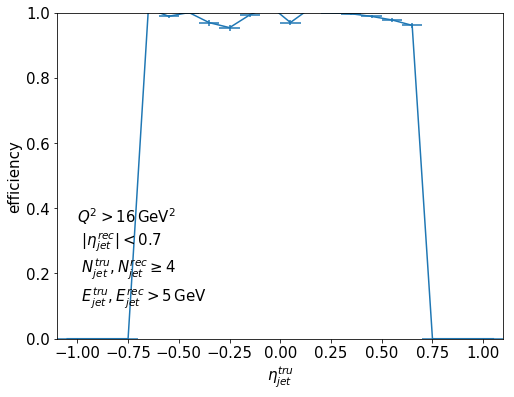

In [101]:
fig = plt.figure(figsize=(8,6))
plt.errorbar(x, y, xerr=0.05, yerr=yerr)
plt.xlim(left=-1.1, right=1.1)
plt.ylim(bottom=0, top=1)
plt.xlabel('$\eta^{tru}_{jet}$', fontsize=15)
plt.ylabel('efficiency', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.text(-1, 0.1, '$Q^2 > 16 \, \mathrm{GeV^2}$ \n $|\eta^{rec}_{jet}| < 0.7$ \n $N^{tru}_{jet}, N^{rec}_{jet} \geq 4$ \n $E^{tru}_{jet}, E^{rec}_{jet} > 5 \, \mathrm{GeV}$', fontsize=15)

In [104]:
print nRec_cut
print nEvt_cut

[0, 0, 0, 0, 491, 433, 434, 438, 412, 421, 450, 476, 500, 515, 533, 582, 562, 587, 0, 0, 0, 0]
[0, 0, 0, 0, 485, 438, 434, 452, 432, 424, 441, 491, 493, 515, 535, 589, 575, 611, 0, 0, 0, 0]
